In [1]:
import os
import keras
import numpy
import cv2
import numpy as np
import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder
from matplotlib import pyplot as plt

D:\Final\Graduation project\code\real time\object detection\gp\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [20]:
labels = [{'name':'Good', 'id':1},{'name':'Defected', 'id':2},{'name':'Detected', 'id':3}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [6]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

# Load previous model if there

In [7]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [8]:
#pip install -v opencv-python==4.7.0.72

Importing cv and Libraries to show pic

In [9]:
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [52]:
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'cast_def_0_1810.jpeg')

# Define classification model & function to classify given image

In [11]:
from keras.models import load_model
saved_model = load_model("model_v11.h5")

def classify(image1):
    img = np.array(image1) / 255.0
    img = img.reshape((1, 224, 224, 3))
    #img = image1
    #img = np.asarray(img)
    #img = np.expand_dims(img, axis=0)
    
    output = saved_model.predict(img)
    #print(output[0][0])
    #print(output[0][1])
    if output[0][0] > output[0][1]:
        return 'defected'
    else:
        return 'good'

In [12]:
image_to_test=cv2.imread('D:/Final/Graduation project/code/real time/object detection/test images/ok1.jpeg')
resized_image = cv2.resize(image_to_test, (224,224), interpolation = cv2.INTER_AREA)
classify(resized_image)

1/1 [==============================] - 0s 440ms/step


'good'

# Test object detection then classify

## define function

In [13]:
def test_image(path):
    img = cv2.imread(path)
    image_np = np.array(img)

    #resize once for model to classify


    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))

    calssify_result='none';
    if(num_detections>=1):
        resized_image = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
        calssify_result=classify(resized_image)

    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)


    label_id_offset = 0

    if (calssify_result=='good'):
        label_id_offset=1
    else:
        label_id_offset=2


    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

## Test with image 

1/1 [==============================] - 0s 202ms/step


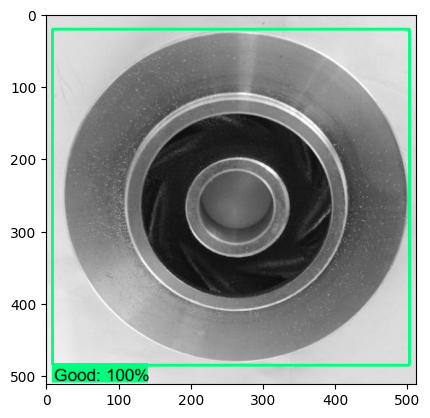

In [14]:
test_image('D:/Final/Graduation project/code/real time/object detection/test images/ok1.jpeg')

# Real-time detection & classification

In [21]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

num_good = 0
num_defected = 0

capture_interval = 2  # Interval in seconds
prev_capture_time = 0

while cap.isOpened():
    ret, frame = cap.read()
    img = frame
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0) , dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections
    
    label_id_offset = 3  
        
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'] + label_id_offset ,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.98,
            agnostic_mode=False)
    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (400, 500)))

    
    current_time = cv2.getTickCount() / cv2.getTickFrequency()
    elapsed_time = current_time - prev_capture_time
    
    if elapsed_time > capture_interval:
        
        
        classify_result = 'none'
        label_id_offset = 0
        
        if num_detections >= 1:
            resized_image = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
            classify_result = classify(resized_image)
                
        if classify_result == 'good':
            label_id_offset = 1
            num_good += 1
            
        elif classify_result == 'defected':
            label_id_offset = 2
            num_defected += 1
        
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        image_np_with_detections = image_np.copy()
        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'] + label_id_offset ,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.98,
            agnostic_mode=False)
        cv2.imshow('object detection', cv2.resize(image_np_with_detections, (400, 500)))
    
    
        prev_capture_time = current_time
    
    
    key = cv2.waitKey(10)
    if key == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

print("Number of 'good' products:", num_good)
print("Number of 'defected' products:", num_defected)


1/1 [==============================] - 0s 200ms/step
Number of 'good' products: 13
Number of 'defected' products: 3
